# Lecture 5 : Algebra
**References:**
* [Introduction to Symbolic Computation](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/index.html), Lectures 
[11](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec11.html), [12](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec12.html), [28](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec28.html), [38](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec38.html), [40](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec40.html)
* [Group theory and Sage](https://doc.sagemath.org/html/en/thematic_tutorials/group_theory.html)
* [Polynomials in Sage](https://doc.sagemath.org/html/en/tutorial/tour_polynomial.html)
* [Extensions of rings in Sage](https://doc.sagemath.org/html/en/reference/rings/sage/rings/ring_extension.html)

**Summary:**<br>
We start the lecture by recalling the useful ``sum`` and ``prod`` functions in Python, as well as more general **iterators** (in particular more fancy **list comprehensions** and tools for products of iterators). In the mathematical part, we begin by discussing (finite) **groups** and how to generate and identify them. Then we discuss **polynomial rings** and how to use them to study **field extensions** or **ideals**.

## Python warmup : sum and prod
Two extremely useful constructions are the Python functions ``sum`` and ``prod`` for computing sums and products of elements in a list (or more general iterable). Here is the basic usage:

In [ ]:
sum([3,-2,6])

Combined with list comprehension:

In [ ]:
sum([i for i in range(1,101)])

We can in fact leave off the brackets above:

In [ ]:
sum(i for i in range(1,101))

Apart from summing integers (or rational numbers, etc), we can in fact sum everything that has a ``+`` operation. In some of these cases, we should specify by hand the "neutral element" that ``sum`` should start with, which is given as a second argument (the default is the ``int 0``):

In [ ]:
sum([[1,2],[3,4]])

In [ ]:
sum([[1,2],[3,4]], [])

A more interesting application of this last point:

In [ ]:
sum([[3*i,3*i+1] for i in range(6)],[])

#### Exercise
The [Euler-Mascheroni constant](https://en.wikipedia.org/wiki/Euler%27s_constant) is defined as the limit
$$
\gamma = \lim_{n \to \infty} \left(- \log(n) + \sum_{k=1}^n \frac{1}{k} \right) = \int_1^\infty \left(\frac{1}{\lfloor x \rfloor} - \frac{1}{x} \right) dx
$$

In [ ]:
plot(1/floor(x), 1,12, color='red', fill=1/x) + plot(1/x, 1, 12)

Compute its approximation for $n=1000$ (alternatively: compute its first 4 digits) using the ``sum`` function.
*Remark:* If you are done early, try to find out if SageMath has this constant stored somewhere.

**Solution** (uncomment to see)
<!---
```
gam_approx = -log(1000) + sum(1/k for k in range(1,1001))
n(gam_approx)
> 0.577220664893197
```
Using some math (or looking on wikipedia) we can see that the error of approximation of $\gamma$ by the formula above behaves like $1/2n$. Thus to get $4$ digits, we should try something like $n=50000$:
```
gam_approx = -log(50000) + sum(1/k for k in range(1,50001))
n(gam_approx)
> 0.577225664868200
```
*After* seeing the result, we can note that our $n$ was sufficiently large: adding or subtracting a number of absolute value at most $1/(2\cdot 50000) = 0.00001$ does not change the first $4$ digits. We can of course also check with the pre-stored value of the constant:
```
n(euler_gamma)
> 0.577215664901533
```
--->

As you can imagine, the function ``prod`` works much the same:

In [ ]:
prod(i for i in range(1,51)) == factorial(50)

We can again take products of more general things. Here is an example: what do you think is the product of all elements in the symmetric group $S_3$?

In [ ]:
S3 = list(SymmetricGroup(3))
prod(S3)

The correct answer is: this depends on the order in which we multiply them! Just for fun, here is the set of all elements we can get like this (we'll see these constructions in more detail below and in the next lecture):

In [ ]:
{prod(p) for p in Permutations(S3)}

If you are interested in the question what elements you can get like this, have a look at the following [answer to a question on math.stackexchange](https://math.stackexchange.com/a/1355671/311445) and the paper cited there.

## Python warmup: more iterators
In this short section, we'll see a bunch of very useful constructions of iterators (used in ``for``-loops or the constructions of lists).

First is a more general version of *list comprehension* that we have seen before. As a reminder, here is the basic version:

In [ ]:
L = [2,3,5,7]
[a^2 for a in L]

More generally, we can have multiple ``for`` in the list comprehension:

In [ ]:
[a*b for a in L for b in L]

As you can see, the output is the list we would have obtained as follows:
```
result = []
for a in L:
    for b in L:
        result.append(a*b)
```
In particular, the order of the ``for``-loops matters.

In addition we can have an ``if``-condition at the end of the list comprehension. Elements are only added to the list if this comprehension is satisfied:

In [ ]:
[a*b for a in L for b in L if a*b > 20]

#### Exercise
Create the list of
* all integers $a$ between 100 and 200 satisfying $a\ \mathrm{mod}\ 3 = 2,\ a\ \mathrm{mod}\ 7 = 4$
* all entries of $\{0,1\}^3 = \{(0,0,0), (1,0,0), \ldots, (1,1,1)\}$

**Solution** (uncomment to see)
<!---
```
[a for a in range(100,201) if a % 3 == 2 and a % 7 == 4]
> [116, 137, 158, 179, 200]
M = [0,1]
[(a,b,c) for a in M for b in M for c in M]
> 
[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]
```
--->

In the exercise above, if we had wanted to compute the list $\{0,1\}^{10}$, it would have required to write lots of ``for`` statements by hand. Instead, we can use the function ``itertools.product``, which we need to **import** by hand as follows before using it:

In [ ]:
from itertools import product

The function ``product`` takes iterables ``A, B, ...`` and returns a generator that we would obtain from the code
```
((a,b,..) for a in A for b in B ...)
```
Here is a first example:

In [ ]:
M = [0,1]
list(product(M, ['a', 'b', 'c']))

In [ ]:
list(product(M, repeat=3))

Given a list ``N`` of lists, the function ``product(*N)`` essentially computes the cartesian product of these lists (hence the name):

In [ ]:
N = [M, M, ['a', 'b', 'c']]
list(product(*N))

#### Exercise
Consider the following list $L$ of integers:

In [ ]:
L = [17,23,31,32,44,59,61,63]

A variant of the [Subset sum problem](https://en.wikipedia.org/wiki/Subset_sum_problem) asks: what are the ways of writing the number $150$ as a sum
$$
a_1 + a_2 + a_3 + a_4 = 150,\quad (a_1, a_2, a_3, a_4 \in L)?
$$
Find all such tuples.

**Solution** (uncomment to see)
<!---
```
[s for s in product(L, repeat=4) if sum(s)==150]
>
[(23, 32, 32, 63),
 (23, 32, 63, 32),
 (23, 63, 32, 32),
 (31, 31, 44, 44),
 (31, 44, 31, 44),
 (31, 44, 44, 31),
 (32, 23, 32, 63),
 (32, 23, 63, 32),
 (32, 32, 23, 63),
 (32, 32, 63, 23),
 (32, 63, 23, 32),
 (32, 63, 32, 23),
 (44, 31, 31, 44),
 (44, 31, 44, 31),
 (44, 44, 31, 31),
 (63, 23, 32, 32),
 (63, 32, 23, 32),
 (63, 32, 32, 23)]
```
Note that above the order really matters. If we wanted to only list the ways up to reordering, we could insist that the tuple ``s`` is ordered. For this we can compare the sorted list ``sorted(s)`` with the conversion of ``s`` to a list via ``list(s)``:
```
[s for s in product(L, repeat=4) if sum(s)==150 and sorted(s)==list(s)]
> [(23, 32, 32, 63), (31, 31, 44, 44)]
```
--->

## Group theory
One of the fundamental objects in algebra are [groups](https://en.wikipedia.org/wiki/Group_(mathematics)). These are abstractly defined as a tuple $(G, \circ)$ of a set $G$ and an operation $\circ : G \times G \to G$ satisfying certain axioms (associativity, existence of neutral and inverse elements).

While SageMath can work with some forms of infinite groups (in particular with [*finitely presented groups*](https://doc.sagemath.org/html/en/reference/groups/sage/groups/finitely_presented.html)), we will mostly look at *finite* groups today. These are represented in SageMath as **permutation groups**, i.e. subgroups of some symmetric group 
$$
S_n = \{\text{permutations of }\{1, \ldots, n\}\}
$$
generated by some elements.

The full symmetric group $S_n$ is created as follows:

In [ ]:
S6 = SymmetricGroup(6); S6

Let's look at a random element of $S_6$:

In [ ]:
S6.random_element()

We see that it is represented in [*cycle notation*](https://en.wikipedia.org/wiki/Permutation#Cycle_notation). E.g. the element $(1,4)(2,3,6) \in S_6$ is the permutation sending
$$
1 \mapsto 4,\ 4 \mapsto 1,\ 2 \mapsto 3,\ 3 \mapsto 6,\ 6 \mapsto 2,\ 5 \mapsto 5.
$$
If we want to create this particular element, this works as follows:

In [ ]:
cycle = ((1,4),(2,3,6))
a = S6(cycle); a

In [ ]:
a(1)

Alternatively, we use the following:

In [ ]:
b = S6("(1,3) (2,5,4)"); b

Now we can multiply, invert or raise elements to some power in the groups $S_6$:

In [ ]:
print(a*b)
print([a^i for i in range(7)])
print(b.inverse())

¡**Careful**!<br>
In SageMath, the convention is that given permutations ``a,b``, the permutation ``a*b`` is the permutation obtained by *first* applying ``a`` and then applying ``b``. This is different from the standard notation $a \circ b$ standing for first applying $b$ and then $a$. It leads to strange things as follows:

In [ ]:
a(b(1))

In [ ]:
(a*b)(1)

In [ ]:
(b*a)(1)

I must say that I find this a bit strange, but for many operations (computing inverses, subgroups generated by a subset, etc) this order does not really matter. You should just think of the ``SymmetricGroup(n)`` acting on the set $\{1, \ldots, n\}$ *from the right*.

Of course we can also create more general finite groups, some of which are given by pre-defined functions:

In [ ]:
CyclicPermutationGroup(5)

In [ ]:
DihedralGroup(8)

In [ ]:
A = AlternatingGroup(5); A

In [ ]:
A.is_subgroup(SymmetricGroup(5))

The phrase ``as a permutation group`` already indicates that the elements of these groups are specified by certain permutations, indicating that they are naturally seen as subgroups of some $S_n$. We can see this in an example by *iterating* through the group to look at its elements:

In [ ]:
H = DihedralGroup(3)
for g in H:
    print(g)

In many cases, it's sufficient to just have a look at the generators of the group, which we can obtain as follows:

In [ ]:
H.gens()

Apart from the specific groups mentioned above, we can also create a group ourselves by generating it inside a symmetric group by a list of permutations:

In [ ]:
H = PermutationGroup([(1,2,3,4,5), ((2,5),(3,4))])

Looking at a picture of a $5$-gon, we see that these two permutations correspond to a rotation and a reflection at the $y$-axis:
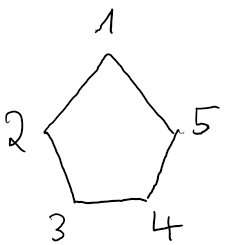

Thus we expect (and can confirm) that the group generated by them is equal to the dihedral group with $2 \cdot 5$ elements:

In [ ]:
H.order()

In [ ]:
H.is_isomorphic(DihedralGroup(5))

Let's use this to try identifying a concrete group:

#### Exercise
Here is a *beautiful* hand-drawn picture of a cube:
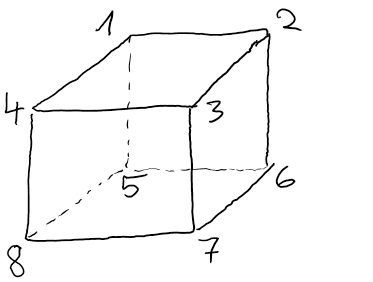
* Find a list of rotations which generate all symmetries of this cube in $\mathrm{SO}(3)$.
* Compute the subgroup $H$ of $S_8$ generated by the permutations these rotations induce on the corners of the cube.
* Find out what group it is and verify your answer with the ``is_isomorphic`` function.

**Solution** (uncomment to see)<br>
<!---
* The rotations $a_x, a_y, a_z$ around the three coordinate axes generate the group of all rotations (hint to prove this: the group generated by these three rotations acts transitively on the $6$ faces of the cube, and the stabilizer of the top face in the group of *all* rotations is generated by $a_z$). The action on the vertices is as follows:
```
ax = ((2,6,7,3),(1,5,8,4))
ay = ((3,4,8,7),(2,1,5,6))
az = ((1,2,3,4),(5,6,7,8))
```
* The group $H$ generated by these is:
```
H = PermutationGroup([az, ax, ay])
```
* The most basic invariant of a group is its order:
```
H.order()
> 24
```
Well, we know a very nice group of order $24$, namely the symmetric group $S_4$. Let's check whether $H$ is isomorphic to $S_4$:
```
H.is_isomorphic(SymmetricGroup(4))
> True
```
For more information see e.g. [here](https://en.wikipedia.org/wiki/Octahedral_symmetry).
--->

Of course SageMath also knows about subgroups, their properties (like being **normal**) and quotient groups.

In [ ]:
G = SymmetricGroup(3)
a = G('(1,2,3)')
H = G.subgroup([a]); H

In [ ]:
H.is_normal()

In [ ]:
G.quotient(H)

We can also list all subgroups of $G$ (possibly up to conjugation):

In [ ]:
list(G.subgroups())

In [ ]:
list(G.conjugacy_classes_subgroups())

#### Exercise
An element $\sigma \in S_n$ is called a *derangement* if the permutation $\sigma$ of $\{1, \ldots, n\}$ has no fixed point, i.e. if $\sigma(i) \neq i$ for all $1 \leq i \leq n$.
Denote by $D_n$ the number of derangements in $S_n$, so that $p_n = D_n/n!$ is the probability that a random permutation $\sigma \in S_n$ has no fixed points. Make some experiments and guess a formula for the limit of $p_n$ as $n \to \infty$.<br>
*Hint:* Maybe look at some examples of $1/p_n$.

*Suggested sub-exercises* (uncomment to see)
<!---
* Write a function ``is_derangement(sigma, n)`` checking whether a permutation ``sigma`` in the symmetric group on ``n`` letters is a derangement. *Hint* The Python function ``all`` can be useful here.
* Write a function ``p(n)`` computing the number $p_n$.
* Print numerical values for $1/p_n$ in several examples, and try to guess what this converges to. *Hint:* If you have accidentally overwritten the function ``n``, you can use e.g. ``r.n()`` to get an approximation of a rational number ``r``, or use ``restore('n')`` to get the function ``n`` back.
--->

**Solution** (uncomment to see)<br>
<!---
While it is possible to solve this exercise using one big block of code, it is much nicer to write several functions in preparation and then have a very short block of code doing the actual work.

So first, we write a function which checks whether a permutation ``sigma`` in $S_n$ is a derangement. For convenience, we hand over the parameter ``n`` as well, though this could be reconstructed from ``sigma`` in principle.
```
def is_derangement(sigma, n):
    return all(sigma(i) != i for i in range(1,n+1))
```
Here we used the ``all`` construction, which takes an iterable spitting out bools and returns ``True`` if and only if all those bools were ``True``.

Next, we want a function computing the numbers $p_n$. The following is the most straightforward way to do it:
```
def p(n):
    count = 0
    for sigma in SymmetricGroup(n):
        if is_derangement(sigma, n):
            count += 1
    return count / factorial(n)
```
However, using a clever combination of ``sum`` and a list comprehension, we can make this much shorter:
```
def p(n):
    return sum(1 for sigma in SymmetricGroup(n) if is_derangement(sigma,n))/factorial(n)
```
With either of the functions, we can now look at some values of $1/p_n$, as suggested in the hint. Here we might run into a weird problem: given a fraction as in the output of ``p`` we would normally write ``n(p/q)`` to get its decimal representation. But probably the variable ``n`` is already used in the ``for``-loop and thus *overwrites* the standard function ``n``. We can solve this by using the *method* ``n`` of Rationals in SageMath: 
```
for n in range(2,12):
    print(1/p(n).n())
> 
2.00000000000000
3.00000000000000
2.66666666666667
2.72727272727273
2.71698113207547
2.71844660194175
2.71826333176026
2.71828369389345
2.71828165766640
2.71828184277783
```
Staring at these numbers a bit, we can guess that they converge to the Euler constant $e$:
```
e.n()
> 2.71828182845905
```
And indeed it is true that $1/p_n \to e$ and thus $p_n \to 1/e$ for $n \to \infty$, see [this wikipedia page](https://en.wikipedia.org/wiki/Derangement#Growth_of_number_of_derangements_as_n_approaches_%E2%88%9E).
--->

We can also do some computations with group homomorphisms (though I would say this is less well-developed). To specify such a homomorphism from $G$ to $H$ , we need to specify the images of the generators of $G$. Let's try to construct a homomorphisms from $G = S_5$ to the cyclic group $H$ of order $4$:

In [ ]:
G = SymmetricGroup(5)
G.gens()

In [ ]:
H = CyclicPermutationGroup(4)
list(H)

I claim that there exists a homomorphism $\varphi : G \to H$ sending $(1,2,3,4,5)$ to the neutral element, and sending $(1,2)$ to the element $(1,3)(2,4)$:

In [ ]:
phi = PermutationGroupMorphism_im_gens(G, H, [H('()'), H('(1,3)(2,4)')]); phi

Now we can compute image and kernel of this morphism and verify the **first isomorphism theorem**:
> Given a group homomorphism $\varphi : G \to H$ we have $\mathrm{im}(\varphi) \cong G/\mathrm{ker}(\varphi)$.

In [ ]:
im = phi.image(G); im

In [ ]:
ker = phi.kernel(); ker

In [ ]:
im.is_isomorphic(G.quotient(ker))

There are many more properties of groups and their elements which can be checked or computed using SageMath (e.g. whether a group is **abelian** or **simple**, the **order** of an element, etc). For most of these, you should be able to find them simply by guessing the name and using ``Tab``-completion, or by googling).

Finally, there are also [libraries](https://gap-packages.github.io/smallgrp/doc/chap1.html#X7C16EA1580AC7586) containing all isomorphism classes of groups of a given (small) order, in particular those of order at most 1023. This can be useful e.g. for checking a conjecture that you might have, or for trying to identify a given group. These libraries are implemented in the computer algebra system [GAP](https://www.gap-system.org/), which SageMath uses in the background to do group theory computations. 

When preparing this lecture, I found that there was not really a convenient way to access these databases, but based on [this answer on math.stackexchange](https://math.stackexchange.com/questions/185534/converting-gap-groups-into-sage-permutation-groups) it is not so hard to write a function for this:

In [ ]:
def gap_group_to_SageMath(A):
    B = A.IsomorphismPermGroup()
    return PermutationGroup(gap_group = B.Image())

def groups_of_order(n):
    number = ZZ(gap.NumberSmallGroups(n))
    # groups numbered from 1 to number
    return [gap_group_to_SageMath(gap.SmallGroup(n,i)) for i in range(1,number+1)]

In [ ]:
groups_of_order(1)

In [ ]:
groups_of_order(2)

In [ ]:
groups_of_order(8)

#### Exercise
The [Feit-Thompson theorem](https://en.wikipedia.org/wiki/Feit%E2%80%93Thompson_theorem) states that every group of odd order is *solvable*. Check the theorem for orders at most 99.<br>
*Remark:* A group $G$ is *solvable* if there exists a sequence of subgroups
$$
1 = G_0 < G_1 < \ldots < G_k = G
$$
such that $G_{j-1}$ is normal in $G_j$ and such that the quotient $G_j / G_{j-1}$ is abelian for $j=1, \ldots, k$. However, you won't need to know this for solving the exercise ...

**Solution** (uncomment to see)<br>
<!---
Using ``groups_of_order`` from above, we can go through the groups of any given order. We only have to guess (or google) that ``G.is_solvable()`` decides whether a group is solvable.
```
for n in range(1,100,2):
    check = all(G.is_solvable() for G in groups_of_order(n))
    print(n, check)
> 
1 True
3 True
5 True
...
99 True
```
--->

Just for fun, we finish with a nice picture: given a group $G$ with generating set $S$, the **Cayley graph** of $(G,S)$ is the oriented graph which has one vertex for each element of the group, and an oriented edge from $g$ to $gh$ for each $g \in G,h \in S$.

In [ ]:
H = DihedralGroup(6)
H.cayley_graph()

For a fun application of group theory: [this lecture](http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec38.html) explains how to solve a Rubik's cube using SageMath (in fact, the interface of SageMath to GAP).

## Polynomial rings and field extensions
Given a base ring $R$, we can create the polynomial ring $S = R[x_1, ..., x_n]$ over $R$, where we can choose the variable names freely. Here is an example with the base ring $R = \mathbb{Q}$:

In [ ]:
S.<x,y> = PolynomialRing(QQ)
f = x^2 + 2*x*y + y^2

Compared to symbolic expressions in the variables ``x,y``, the polynomials in ``S`` have some additional functions (which don't make sense for general symbolic expressions):

In [ ]:
f.degree()

Recall that an element $f$ of a ring $S$ is *prime* if $p \neq 0$ and $p$ is not a unit and whenever $p$ divides $a \cdot b$ for some $a,b \in S$ then $p$ divides $a$ or $p$ divides $b$.

In [ ]:
f.is_prime()

Since $S = \mathbb{Q}[x,y]$ is a *unique factorization domain*, an element which is not prime must be *reducible*:

In [ ]:
factor(f)

The construction ``S.<x,y,...> = PolynomialRing(QQ)`` automatically sets the variables ``x,y,...`` to be generators of the new ring ``S``. We can also first create the ring abstractly, and then get our hands on the generators manually:

In [ ]:
T = PolynomialRing(ZZ, 'x', 9); T

In [ ]:
X = T.gens(); X

In [ ]:
g = X[0]*X[1]; g

#### Exercise
Is the polynomial $f=X^8 + Y^8$ a prime element in 
* $\mathbb{Q}[x,y]$
* $\mathbb{F}_2[x,y]$

If not, specify a factorization.

**Solution** (uncomment to see)
<!---
```
S.<x,y> = PolynomialRing(QQ)
f = x^8 + y^8
f.is_prime()
> True
S.<x,y> = PolynomialRing(GF(2))
f = x^8 + y^8
f.is_prime()
> False
factor(f)
> (x + y)^8
```
This last factorization is an example of the [freshman's dream](https://en.wikipedia.org/wiki/Freshman%27s_dream) coming true: in characteristic $p$ it is true that $(x+y)^q = x^q + y^q$ for $q=p^r$ a power of $p$.
--->

Given a polynomial, we can get access to its coefficients as follows:

In [ ]:
S.<x,y> = PolynomialRing(QQ)
f = x^2 + 2*x*y + y^2 + 17*x + 32
f.dict()

Using polynomials, we can now also play around with finite *field extensions*. Recall that given a field $K$ and an irreducible polynomial $g \in K[x]$, the quotient $S = K[x]/(g)$ is a field extension of $K$ of order $\mathrm{deg}(g)$.

In [ ]:
P.<x> = PolynomialRing(QQ)
g = x^2 + 1
g.is_irreducible()

In [ ]:
S.<i> = QQ.extension(g)
S

In [ ]:
S.degree()

Since in the ring $S$ we adjoined a root of the polynomial $g$, it is no longer irreducible considered as an element of $S[x]$:

In [ ]:
Q.<x> = PolynomialRing(S) # the ring Q = S[x]
gS = Q(g)                 # gS is the polynomial g = x^2 + 1 seen as an element of Q
gS.is_irreducible()

In [ ]:
factor(gS)

#### Exercise
Construct the following field extensions of $K = \mathbb{Q}$:
$$
L = K[x]/(x^2-2),\\
N = L[y]/(y^2-x).
$$
Check that $L/K$ and $N/L$ are *Galois* extensions (use ``Tab``-completion and the documentation via ``?`` to find the right commands). Also check that $N/K$ is *not* Galois. This is the classical example showing that it's not true that the composition of two Galois extensions is Galois.<br>
*Bonus exercise:* Find an irreducible polynomial $g \in \mathbb{Q}[x]$ which has a root in $N$ but does not split as a product of linear factors.

**Solution** (uncomment to see)
<!---
```
K = QQ
S.<x> = PolynomialRing(K)
L.<a> = K.extension(x^2-2)
L.is_galois() # L/K is Galois
> True
T.<y> = PolynomialRing(L)
N.<b> = L.extension(y^2-a)
N.is_galois_relative() # N/L is Galois
> True
N.is_galois_absolute() # N/K is not Galois
> False
```
Why is this extension not Galois? If you [recall](https://en.wikipedia.org/wiki/Galois_extension), one of the equivalent conditions of $N/K$ being Galois would be that every irreducible polynomial in $K[x]$ with at least one root in $N$ splits over $N$ and is separable. However, the polynomial $g = x^4 - 2 \in \mathbb{Q}[x]$ does not satisfy this:
```
g = x^4-2
g.is_irreducible()
> True
U.<x> = PolynomialRing(N)
gU = U(g)
factor(gU)
> (x - b) * (x + b) * (x^2 + a)
```
--->

Speaking of Galois extensions: we can of course also compute the Galois group of a field extension, and it naturally operates on elements of the larger field:

In [ ]:
P.<x> = PolynomialRing(QQ)
g = x^2 + 1
S.<i> = QQ.extension(g)

In [ ]:
G = S.galois_group(); G

In [ ]:
list(G)

In [ ]:
G[1](i)

Finally, we can create ideals in polynomial rings:

In [ ]:
PR.<x,y> = PolynomialRing(QQ)
f = x^2 - y
g = x^3 - x
J = Ideal([f,g])
J

In [ ]:
y-x^4 in J

In [ ]:
J.is_prime()

In [ ]:
(y in J, y-1 in J)

In [ ]:
y*(y-1) in J

In the background, SageMath computes a so-called [*Gröbner basis*](https://en.wikipedia.org/wiki/Gr%C3%B6bner_basis) of the ideal $J$. This is a particular set of generators of the ideal, such that there exist algorithms for answering questions like:
* is a given element of the polynomial ring contained in the ideal,
* are two ideals $J_1, J_2$ equal,
* what is the intersection $J_1 \cap J_2$ of two ideals, ...

In some cases, these can even be used to compute the solution set of a system of polynomial equations explicitly, in particular if this solution set is finite. Here is how we compute the solution set of the equations
$$ x^2 -y = 0, x^3 - x = 0 $$
above, whose left-hand sides generate the ideal $J$:

In [ ]:
X = J.variety(QQ); X

These are really interesting topics and algorithms, but since this lecture focuses primarily on applications, we will not go further into details here.

## Assignments

#### Exercise
Compute the following:
* the list of prime numbers between 100 and 200 which end in the digit '3'
* the number of matrices in $\mathrm{Mat}_{4 \times 4}(\mathbb{F}_2)$ which are invertible

**Solution** (uncomment to see)
<!---
```
[p for p in range(100,201) if ZZ(p).is_prime() and p % 10 == 3]
> [103, 113, 163, 173, 193]
```
Since ``matrix(GF(2),n,m,L)`` for a list ``L`` of $n \cdot m$ integers will simply fill the $n \times m$-matrix with these integers row by row, the following works:
```
from itertools import product
# create all matrices
M = [matrix(GF(2),4,4,L) for L in product(GF(2), repeat=16)]
# select the ones that are invertible
N = [m for m in M if m.is_invertible()]
len(N)
> 20160
```
The following is much shorter, but uses the function ``MatrixSpace`` to create the list ``M`` above:
```
len([A for A in MatrixSpace(GF(2),4) if A.is_invertible()])
> 20160
```
--->

#### Exercise
For a subgroup $G \subseteq S_n$ of $S_n$, denote by
$$
p(G) = \frac{|\{\sigma \in G: \sigma\text{ is a derangement}\}|}{|G|}\,.
$$
The numbers $p_n$ from the first exercise about derangements above are exactly $p_n = p(S_n)$. Last year, my friend Kaloyan Slavov (working at ETH Zurich) and Bjorn Poonen showed the following fun theorem.<br>
> **Theorem** ([PS21](https://arxiv.org/abs/2107.02724))<br>
> If a subgroup $G \subseteq S_n$ satisfies $p(G) = p_n$, then $G = S_n$.

Using clever arguments, they prove the theorem for $n \geq 12$, and for $n \leq 11$ they use a computer program written in [Magma](https://en.wikipedia.org/wiki/Magma_(computer_algebra_system)). However, Magma is neither free nor open source! Show them that SageMath can also be used to prove their theorem for $n \leq 11$!<br>
*Hint:* We already had an exercise about derangements above, so you might be able to recycle some of your code there!

**Solution** (uncomment to see)<br>
<!---
We take code from the previous exercise, but modify the function ``p`` to now take a permutation group ``G`` and return the number $p(G)$:
```
def is_derangement(sigma, n):
    return all(sigma(i) != i for i in range(1,n+1))

def p(G,n):
    return sum(1 for sigma in G if is_derangement(sigma,n))/G.order()
```
Now we write a function ``check`` verifying the theorem for a given $n$. Note that we don't have to go through *all* subgroups of $S_n$, it suffices to go through any *conjugacy class* of a subgroup. The reason is that a permutation is a derangement iff any conjugate of the permutation is a derangement.
```
def check(n):
    H = SymmetricGroup(n)
    pn = p(H,n)
    for G in H.conjugacy_classes_subgroups():
        # if G is a proper subgroup but has same p(G) as p(S_n), then we found a counter-example
        if G.order()<factorial(n) and p(G,n)==pn:
            return (False, G)
    # if we didn't find a counter-example, then the theorem is true
    return True
```
Now we can run it for $n=2, \ldots, 11$, which can take a while:
```
for n in range(2,6):
    print(n, check(n))
> 
2 True
3 True
...
11 True
```
--->

#### Exercise
Compute the splitting field $T$ of the polynomial $g = x^5 - 3 x^3 + x^2 -3 \in \mathbb{Q}[x]$ by iteratively adjoining roots of the polynomial to $\mathbb{Q}$. What is the degree of the field extension $T/\mathbb{Q}$?

**Solution** (uncomment to see)<br>
<!---
If we start naively, we get an error message:
```
R.<x> = PolynomialRing(QQ)
g = x^5-3*x^3+x^2-3
S.<a> = QQ.extension(g)
> 
---------------------------------------------------------------------------
ValueError
...
ValueError: defining polynomial (x^5 - 3*x^3 + x^2 - 3) must be irreducible
```
So in fact the polynomial $g$ is not irreducible! Ok, let's factor it:
```
factor(g)
> (x + 1) * (x^2 - x + 1) * (x^2 - 3)
```
The root $x=-1$ is already contained in $\mathbb{Q}$, so let's first adjoin the root of $x^2-3$ and then the one of $x^2-x+1$. Note that below we don't have to introduce a new polynomial ring in each step, since SageMath is smart enough to recognize what we are trying to do:
```
S.<a> = QQ.extension(x^2-3); S
> Number Field in a with defining polynomial x^2 - 3
T.<b> = S.extension(x^2-x+1); T
> Number Field in b with defining polynomial x^2 - x + 1 over its base field
```
Let's check that $g$ factors over $T$:
```
W.<x> = PolynomialRing(T)
gT = W(g)
factor(gT)
> (x + 1) * (x - b) * (x - a) * (x + a) * (x + b - 1)
```
Computing the degree of the extension $T/\mathbb{Q}$ then works as follows:
```
T.absolute_degree()
> 4
```
See also Exercise 1 and solution on [this exercise sheet](https://www2.math.ethz.ch/education/bachelor/lectures/fs2014/math/algebra2/sol11) from which I took the polynomial above.
--->